In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
import FinanceDataReader as fdr
df_=fdr.DataReader('SPY','2018-1-1','2019-1-1').iloc[:,:5]

https://github.com/bukosabino/ta

https://technical-analysis-library-in-python.readthedocs.io/en/latest/

https://school.stockcharts.com/doku.php

https://www.investopedia.com/

In [3]:
import ta

In [4]:
def plot(series,figsize=(8,4)):
    plt.figure(figsize=figsize)
    plt.plot(series)
    plt.title(series.name)
    plt.show()
    
def corrmat(a,b, name1,name2):
    return pd.DataFrame({name1:a,name2:b}).dropna().corr()

def sma(series, window):
    return series.rolling(window).mean()

In finance, technical analysis is an analysis methodology for forecasting the direction of prices through the study of past market data, primarily price and volume. Behavioral economics and quantitative analysis use many of the same tools of technical analysis, which, being an aspect of active management, stands in contradiction to much of modern portfolio theory. The efficacy of both technical and fundamental analysis is disputed by the efficient-market hypothesis, which states that stock market prices are essentially unpredictable, and research on whether technical analysis offers any benefit has produced mixed results.

https://en.wikipedia.org/wiki/Technical_analysis

bukosabino's *ta* 42 indicators

Volume

- Money Flow Index (MFI)
- Accumulation/Distribution Index (ADI)
- On-Balance Volume (OBV)
- Chaikin Money Flow (CMF)
- Force Index (FI)
- Ease of Movement (EoM, EMV)
- Volume-price Trend (VPT)
- Negative Volume Index (NVI)
- Volume Weighted Average Price (VWAP)

Volatility

- Average True Range (ATR)
- Bollinger Bands (BB)
- Keltner Channel (KC)
- Donchian Channel (DC)
- Ulcer Index (UI)


Trend

- Simple Moving Average (SMA)
- Exponential Moving Average (EMA)
- Weighted Moving Average (WMA)
- Moving Average Convergence Divergence (MACD)
- Average Directional Movement Index (ADX)
- Vortex Indicator (VI)
- Trix (TRIX)
- Mass Index (MI)
- Commodity Channel Index (CCI)
- Detrended Price Oscillator (DPO)
- KST Oscillator (KST)
- Ichimoku Kinkō Hyō (Ichimoku)
- Parabolic Stop And Reverse (Parabolic SAR)
- Schaff Trend Cycle (STC)


Momentum
- Relative Strength Index (RSI)
- Stochastic RSI (SRSI)
- True strength index (TSI)
- Ultimate Oscillator (UO)
- Stochastic Oscillator (SR)
- Williams %R (WR)
- Awesome Oscillator (AO)
- Kaufman's Adaptive Moving Average (KAMA)
- Rate of Change (ROC)
- Percentage Price Oscillator (PPO)
- Percentage Volume Oscillator (PVO)


Others
- Daily Return (DR)
- Daily Log Return (DLR)
- Cumulative Return (CR)

In [5]:
close = df_.Close
low = df_.Low
open = df_.Open
high = df_.High
volume = df_.Volume
ret = close.pct_change().dropna().rename('ret')
sma_ret = close.rolling(14).mean().pct_change().dropna().rename('sma_ret')
mom = close.diff().dropna().rename('momentum')
mom_volume = volume.diff().dropna().rename('volume_momentum')

In [6]:
allta = ta.add_all_ta_features(df_,'Open','High','Low','Close','Volume')

C:\Users\JHCho\anaconda3\envs\py37\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\JHCho\anaconda3\envs\py37\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [7]:
names = allta.columns
len(names)

88

In [8]:
ohlcv = names[0:5]
volumes = names[5:15]
volatility = names[15:36]
trend = names[36:70]
momentum = names[70:85]
others = names[85:]

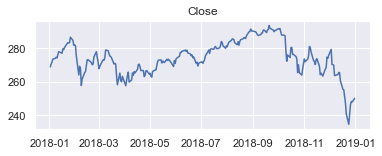

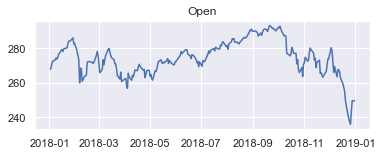

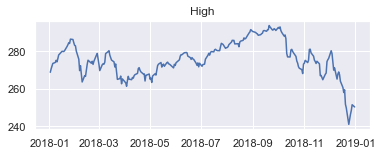

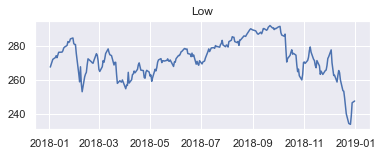

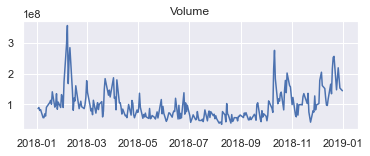

In [9]:
for i in ohlcv:
    plt.figure(figsize=(6,2))
    plt.plot(allta[i])
    plt.title(i)
    plt.show()

Let us see in depth

# Momentum

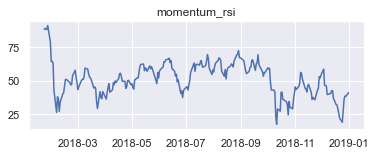

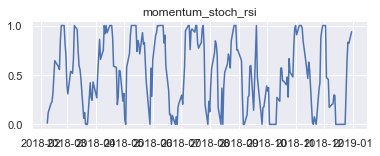

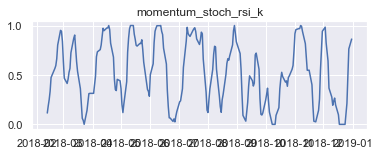

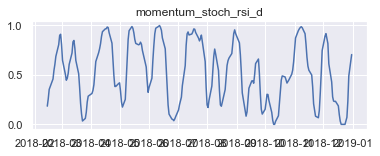

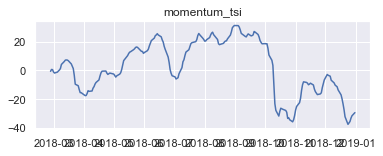

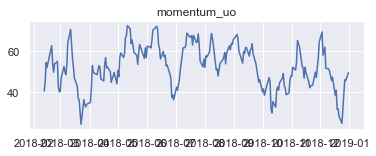

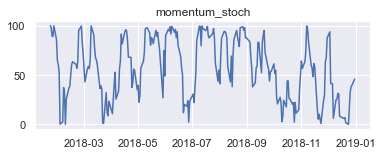

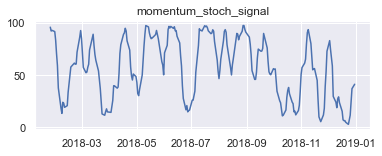

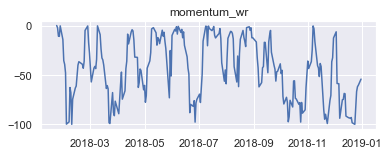

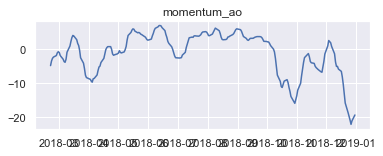

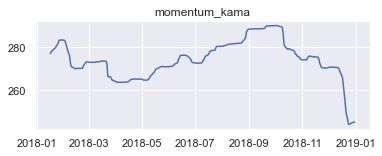

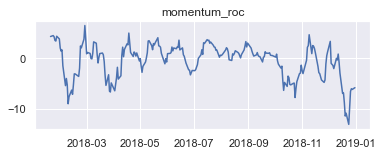

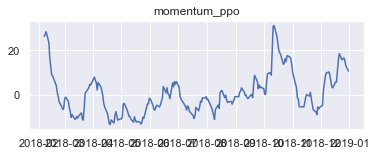

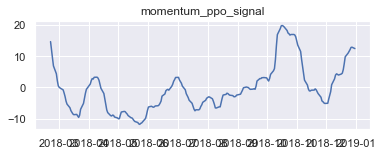

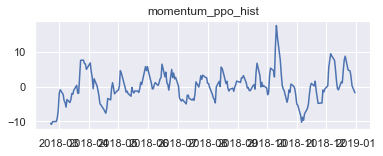

In [10]:
for i in momentum:
    plt.figure(figsize=(6,2))
    plt.plot(allta[i])
    plt.title(i)
    plt.show()

In [13]:
df_mom = allta[momentum].join([ret,sma_ret,close])

In [14]:
momentum

Index(['momentum_rsi', 'momentum_stoch_rsi', 'momentum_stoch_rsi_k',
       'momentum_stoch_rsi_d', 'momentum_tsi', 'momentum_uo', 'momentum_stoch',
       'momentum_stoch_signal', 'momentum_wr', 'momentum_ao', 'momentum_kama',
       'momentum_roc', 'momentum_ppo', 'momentum_ppo_signal',
       'momentum_ppo_hist'],
      dtype='object')

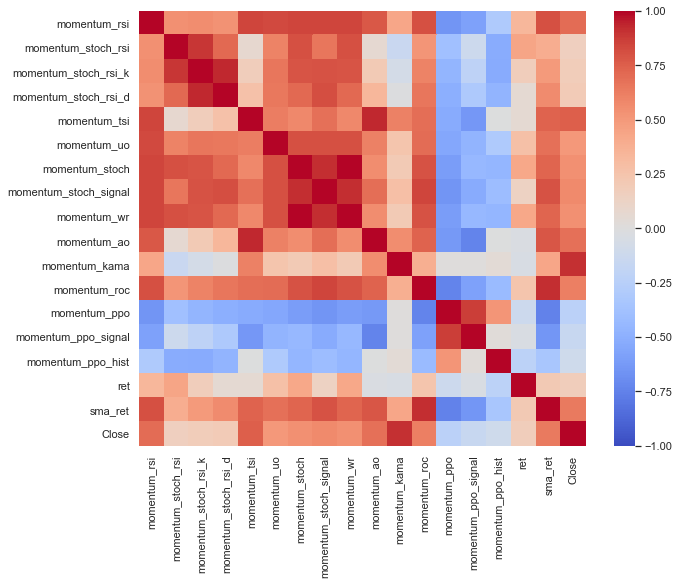

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df_mom.corr(), cmap='coolwarm',vmin=-1,vmax=1, annot=False)
plt.show()

In [17]:
# Highly correlated market features
corr = df_mom.corr()
h = 0.8
where = (abs(corr)>h) & (corr<1)

hc_list =[]
for i in range(len(np.where(where)[0])):
    hc_list.append(sorted([corr.columns[np.where(where)[0][i]], corr.columns[np.where(where)[1][i]]]))
hc_list = np.array(sorted(hc_list))[::2,:]
print('Pairs of above-{}-correlated features : \n '.format(h) , hc_list)

Pairs of above-0.8-correlated features : 
  [['Close' 'momentum_kama']
 ['momentum_ao' 'momentum_tsi']
 ['momentum_ppo' 'momentum_ppo_signal']
 ['momentum_roc' 'momentum_rsi']
 ['momentum_roc' 'momentum_stoch']
 ['momentum_roc' 'momentum_stoch_signal']
 ['momentum_roc' 'momentum_wr']
 ['momentum_roc' 'sma_ret']
 ['momentum_rsi' 'momentum_stoch']
 ['momentum_rsi' 'momentum_stoch_signal']
 ['momentum_rsi' 'momentum_tsi']
 ['momentum_rsi' 'momentum_uo']
 ['momentum_rsi' 'momentum_wr']
 ['momentum_rsi' 'sma_ret']
 ['momentum_stoch' 'momentum_stoch_rsi']
 ['momentum_stoch' 'momentum_stoch_signal']
 ['momentum_stoch' 'momentum_uo']
 ['momentum_stoch_rsi' 'momentum_stoch_rsi_k']
 ['momentum_stoch_rsi' 'momentum_wr']
 ['momentum_stoch_rsi_d' 'momentum_stoch_rsi_k']
 ['momentum_stoch_rsi_d' 'momentum_stoch_signal']
 ['momentum_stoch_signal' 'momentum_uo']
 ['momentum_stoch_signal' 'momentum_wr']
 ['momentum_stoch_signal' 'sma_ret']
 ['momentum_uo' 'momentum_wr']]


## Relative Strength Index (RSI)

The relative strength index (RSI) is a momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset.

RSI = 100 - 100/1+RS

RS = Average Gain / Average Loss

Wilder considered RSI overbought above 70 and oversold below 30.

In [19]:
rsi = allta.momentum_rsi

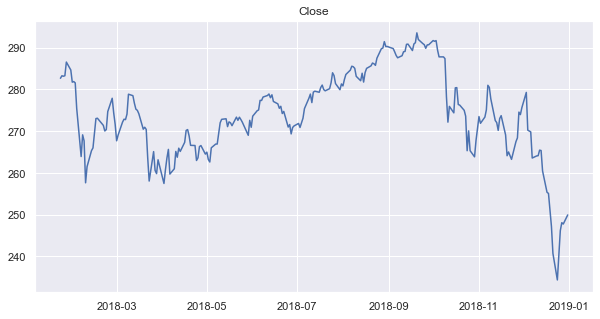

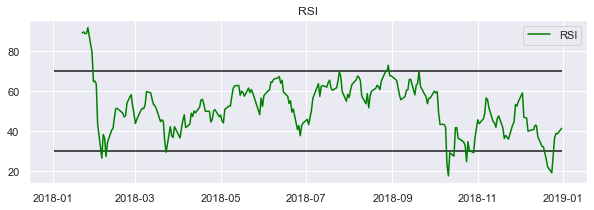

In [23]:
plot(close.loc[rsi.dropna().index],figsize=(10,5))
plt.figure(figsize=(10,3))
plt.plot(rsi, label='RSI',c='green')
plt.hlines(70,rsi.index[0],rsi.index[-1])
plt.hlines(30,rsi.index[0],rsi.index[-1])
plt.title('RSI')
plt.legend()
plt.show()

## Stochastic RSI (SRSI)

The StochRSI oscillator was developed to take advantage of both momentum indicators in order to create a more sensitive indicator that is attuned to a specific security’s historical performance rather than a generalized analysis of price change.

StochRSI = (RSI - Lowest Low RSI) / (Highest High RSI - Lowest Low RSI)

- 14-day StochRSI equals 0 when RSI is at its lowest point for 14 days.

- 14-day StochRSI equals 1 when RSI is at its highest point for 14 days.

- 14-day StochRSI equals .5 when RSI is in the middle of its 14-day high-low range.

- 14-day StochRSI equals .2 when RSI is near the low of its 14-day high-low range.

- 14-day StochRSI equals .80 when RSI is near the high of its 14-day high-low range.

First, it can be used to identify overbought or oversold conditions. A move above .80 is considered overbought, while a move below .20 is considered oversold. 

Second, it can be used to identify the short-term trend. As a bound oscillator, the centerline is at .50. StochRSI reflects an uptrend when consistently above .50 and a downtrend when consistently below .50. Because this indicator is quite volatile, some smoothing with a moving average can help for short-term trend identification.

In [31]:
stoch_rsi = allta.momentum_stoch_rsi
stoch_rsi_d = allta.momentum_stoch_rsi_d
stoch_rsi_k = allta.momentum_stoch_rsi_k

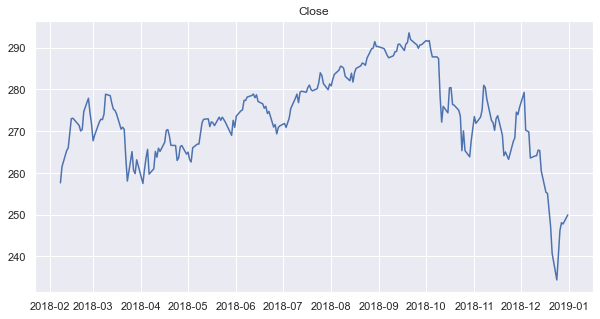

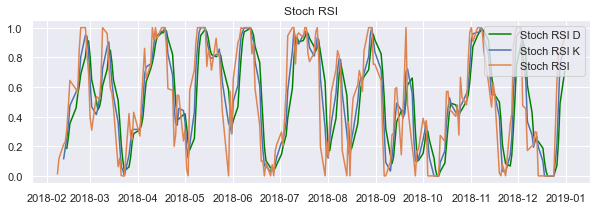

In [35]:
plot(close.loc[stoch_rsi.dropna().index],figsize=(10,5))
plt.figure(figsize=(10,3))
plt.plot(stoch_rsi_d, label='Stoch RSI D',c='green')
plt.plot(stoch_rsi_k, label='Stoch RSI K')
plt.plot(stoch_rsi, label='Stoch RSI')
plt.title('Stoch RSI')
plt.legend()
plt.show()

## True strength index (TSI)

Double Smoothed PC

- PC = Current Price minus Prior Price
- First Smoothing = 25-period EMA of PC
- Second Smoothing = 13-period EMA of 25-period EMA of PC

Double Smoothed Absolute PC

- Absolute Price Change |PC| = Absolute Value of Current Price minus Prior Price
- First Smoothing = 25-period EMA of |PC|
- Second Smoothing = 13-period EMA of 25-period EMA of |PC|

TSI = 100 x (Double Smoothed PC / Double Smoothed Absolute PC)

The True Strength Index (TSI) is an oscillator that fluctuates between positive and negative territory. As with many momentum oscillators, the centerline defines the overall bias. The bulls have the momentum edge when TSI is positive and the bears have the edge when it's negative. 

As with MACD, a signal line can be applied to identify upturns and downturns. Signal line crossovers are, however, quite frequent and require further filtering with other techniques.

In [38]:
tsi = allta.momentum_tsi #25,13

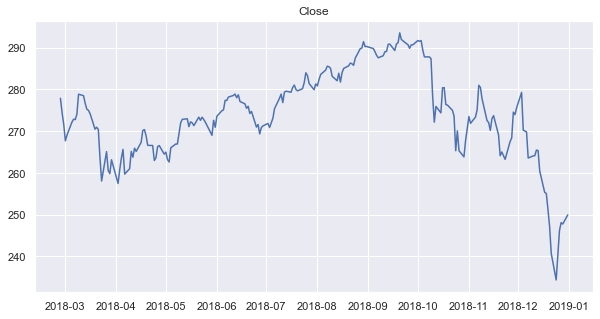

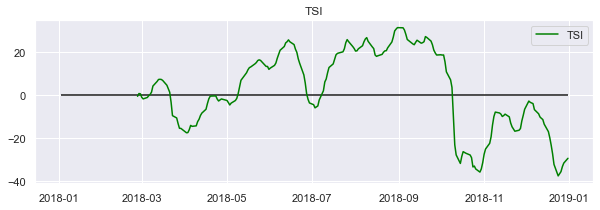

In [39]:
plot(close.loc[tsi.dropna().index],figsize=(10,5))
plt.figure(figsize=(10,3))
plt.plot(tsi, label='TSI',c='green')
plt.hlines(0,tsi.index[0],tsi.index[-1])
plt.title('TSI')
plt.legend()
plt.show()

In [40]:
corrmat(rsi,tsi,'rsi','tsi')

,rsi,tsi
rsi,1.000000,0.851111
tsi,0.851111,1.000000


## Ultimate Oscillator (UO)

BP = Close - Minimum(Low or Prior Close).
 
TR = Maximum(High or Prior Close)  -  Minimum(Low or Prior Close)

Average7 = (7-period BP Sum) / (7-period TR Sum)
Average14 = (14-period BP Sum) / (14-period TR Sum)
Average28 = (28-period BP Sum) / (28-period TR Sum)

UO = 100 x [(4 x Average7)+(2 x Average14)+Average28]/(4+2+1)

There are three steps to a buy signal. 
- First, a bullish divergence forms between the indicator and security price. This means the Ultimate Oscillator forms a higher low as price forges a lower low. The higher low in the oscillator shows less downside momentum. 
- Second, the low of the bullish divergence should be below 30. This is to ensure that prices are somewhat oversold or at a relative extremity. 
- Third, the oscillator rises above the high of the bullish divergence.

In [41]:
uo = allta.momentum_uo

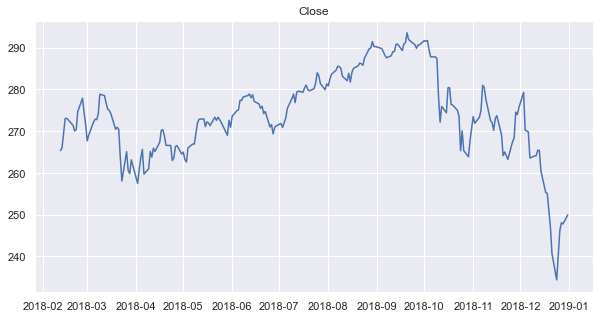

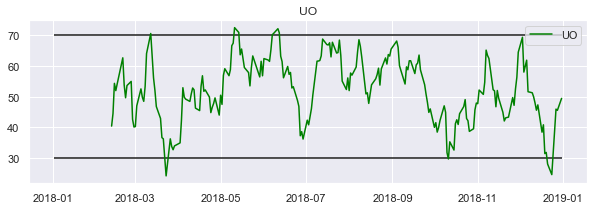

In [43]:
plot(close.loc[uo.dropna().index],figsize=(10,5))
plt.figure(figsize=(10,3))
plt.plot(uo, label='UO',c='green')
plt.hlines(70,uo.index[0],uo.index[-1])
plt.hlines(30,uo.index[0],uo.index[-1])
plt.title('UO')
plt.legend()
plt.show()

In [44]:
corrmat(uo,rsi,'uo','rsi')

,uo,rsi
uo,1.000000,0.834222
rsi,0.834222,1.000000


## Stochastic Oscillator (SR)

%K = (Current Close - Lowest Low)/(Highest High - Lowest Low) * 100

%D = 3-day SMA of %K

Lowest Low = lowest low for the look-back period

Highest High = highest high for the look-back period

%K is multiplied by 100 to move the decimal point two places

Traditional settings use 80 as the overbought threshold and 20 as the oversold threshold. These levels can be adjusted to suit analytical needs and security characteristics. Readings above 80 for the 20-day Stochastic Oscillator would indicate that the underlying security was trading near the top of its 20-day high-low range. Readings below 20 occur when a security is trading at the low end of its high-low range.

In [113]:
stoch_k = allta.momentum_stoch
stoch_d = allta.momentum_stoch_signal

stoch_div = (stoch_k - stoch_d).rename('stoch_diff')

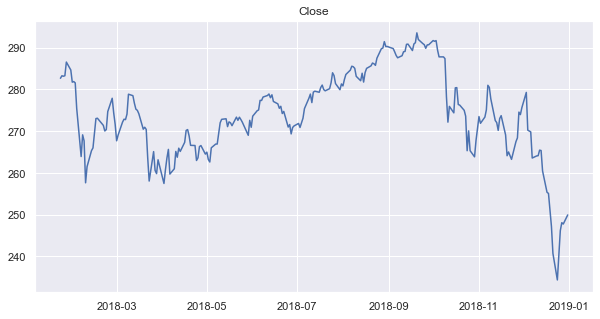

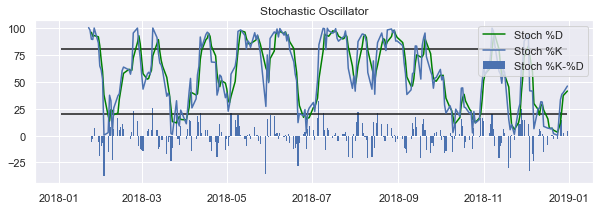

In [59]:
plot(close.loc[stoch_k.dropna().index],figsize=(10,5))
plt.figure(figsize=(10,3))
plt.plot(stoch_d, label='Stoch %D',c='green')
plt.plot(stoch_k, label='Stoch %K')
plt.hlines(80,stoch_k.index[0],stoch_k.index[-1])
plt.hlines(20,stoch_k.index[0],stoch_k.index[-1])
plt.bar(stoch_div.index,stoch_div, label='Stoch %K-%D', linewidth =0)
plt.title('Stochastic Oscillator')
plt.legend()
plt.show()

**STOCHASTIC SLOW**

In [53]:
stoch_k_slow = sma(allta.momentum_stoch,3)
stoch_d_slow = sma(stoch_k_slow,3)

stoch_div_slow = stoch_k_slow - stoch_d_slow

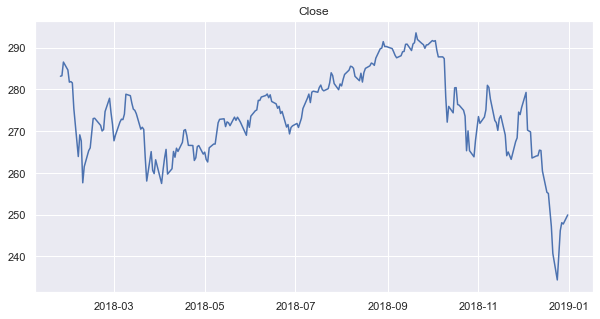

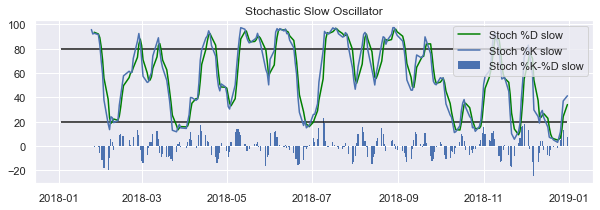

In [60]:
plot(close.loc[stoch_k_slow.dropna().index],figsize=(10,5))
plt.figure(figsize=(10,3))
plt.plot(stoch_d_slow, label='Stoch %D slow',c='green')
plt.plot(stoch_k_slow, label='Stoch %K slow')
plt.hlines(80,stoch_k.index[0],stoch_k.index[-1])
plt.hlines(20,stoch_k.index[0],stoch_k.index[-1])
plt.bar(stoch_div_slow.index,stoch_div_slow, label='Stoch %K-%D slow', linewidth =0)
plt.title('Stochastic Slow Oscillator')
plt.legend()
plt.show()

In [55]:
corrmat(rsi,stoch_d, 'rsi','stoch_d')

,rsi,stoch_d
rsi,1.000000,0.850612
stoch_d,0.850612,1.000000


In [56]:
corrmat(rsi,stoch_div, 'rsi','stoch_div')

,rsi,stoch_div
rsi,1.000000,0.128506
stoch_div,0.128506,1.000000


## Williams %R (WR)

Williams %R is a momentum indicator that is the inverse of the Fast Stochastic Oscillator.

%R = (Highest High - Close)/(Highest High - Lowest Low) * -100

Lowest Low = lowest low for the look-back period 

Highest High = highest high for the look-back period 

%R is multiplied by -100 correct the inversion and move the decimal.

In [61]:
wr = allta.momentum_wr

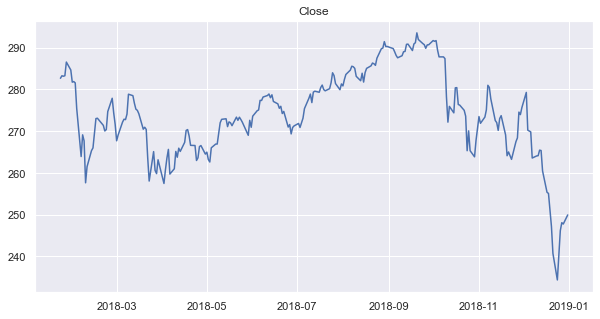

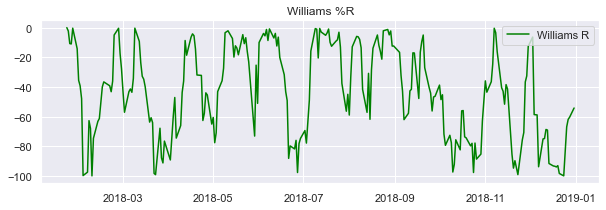

In [63]:
plot(close.loc[wr.dropna().index],figsize=(10,5))
plt.figure(figsize=(10,3))
plt.plot(wr, label='Williams R',c='green')
plt.title('Williams %R')
plt.legend()
plt.show()

In [64]:
corrmat(wr,stoch_k,'WR','STOCH_K')

,WR,STOCH_K
WR,1.0,1.0
STOCH_K,1.0,1.0


## Awesome Oscillator (AO)

Awesome Oscillator is a 34-period simple moving average, plotted through the central points of the bars (H+L)/2, and subtracted from the 5-period simple moving average, graphed across the central points of the bars (H+L)/2.

MEDIAN PRICE = (HIGH+LOW)/2

AO = SMA(MEDIAN PRICE, 5)-SMA(MEDIAN PRICE, 34)

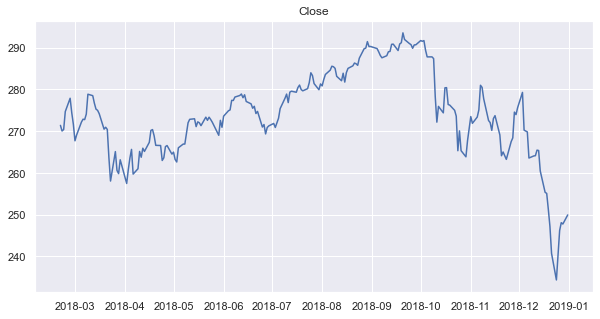

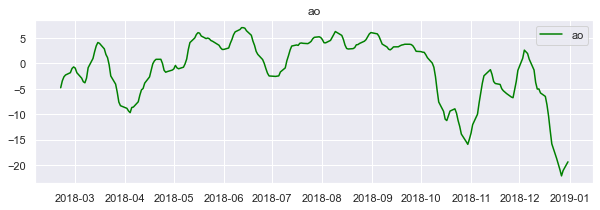

In [66]:
ao = allta.momentum_ao
plot(close.loc[ao.dropna().index],figsize=(10,5))
plt.figure(figsize=(10,3))
plt.plot(ao, label='ao',c='green')
plt.title('ao')
plt.legend()
plt.show()

In [67]:
corrmat(tsi,ao,'tsi','ao')

,tsi,ao
tsi,1.000000,0.930243
ao,0.930243,1.000000


## Kaufman's Adaptive Moving Average (KAMA)

Moving average designed to account for market noise or volatility. KAMA will closely follow prices when the price swings are relatively small and the noise is low. KAMA will adjust when the price swings widen and follow prices from a greater distance. This trend-following indicator can be used to identify the overall trend, time turning points and filter price movements.

In [68]:
kama = allta.momentum_kama

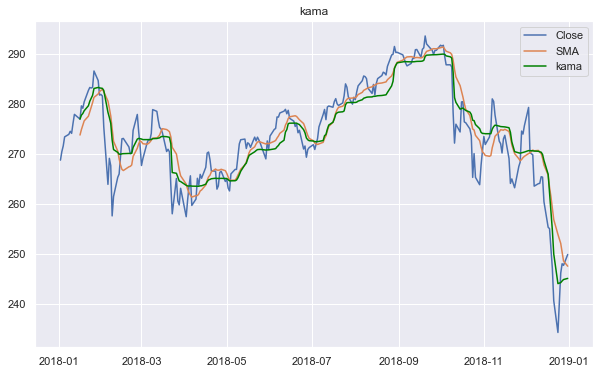

In [74]:
plt.figure(figsize=(10,6))
plt.plot(close,label='Close')
plt.plot(ta.trend.sma_indicator(close,10), label='SMA')
plt.plot(kama, label='kama',c='green')
plt.title('kama')
plt.legend()
plt.show()

## Rate of Change (ROC)

ROC = [(Close - Close n periods ago) / (Close n periods ago)] * 100

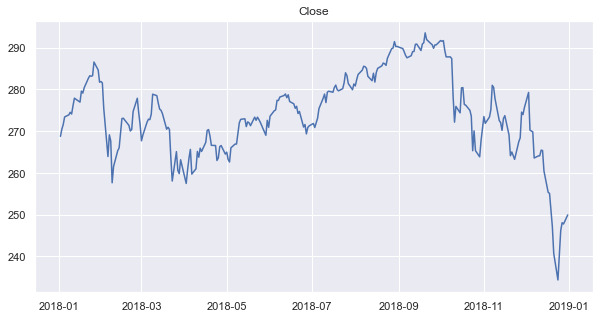

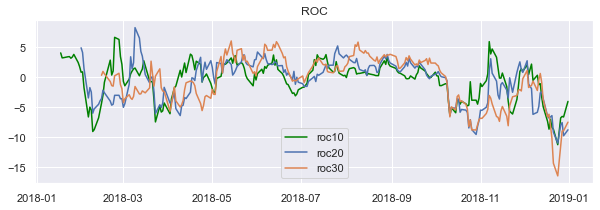

In [118]:
roc_10 = ta.momentum.roc(close,10).rename('roc_10')
roc_20 = ta.momentum.roc(close,20).rename('roc_20')
roc_30 = ta.momentum.roc(close,30).rename('roc_30')


plot(close,figsize=(10,5))
plt.figure(figsize=(10,3))
plt.plot(roc_10, label='roc10',c='green')
plt.plot(roc_20, label='roc20')
plt.plot(roc_30, label='roc30')
plt.title('ROC')
plt.legend()
plt.show()

## Percentage Price Oscillator (PPO)

Percentage Price Oscillator (PPO): {(12-day EMA - 26-day EMA)/26-day EMA} x 100

Signal Line: 9-day EMA of PPO

PPO Histogram: PPO - Signal Line

In [119]:
ppo = ta.momentum.ppo(close)
ppo_diff = ta.momentum.ppo_hist(close)
ppo_sig = ta.momentum.ppo_signal(close)

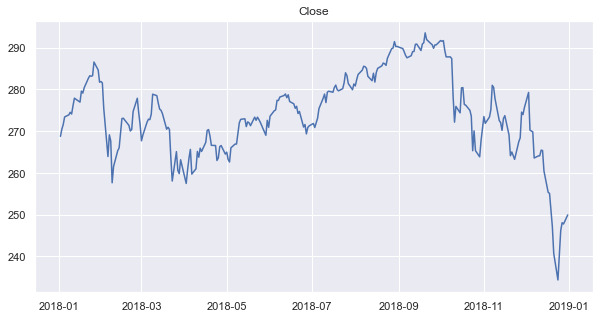

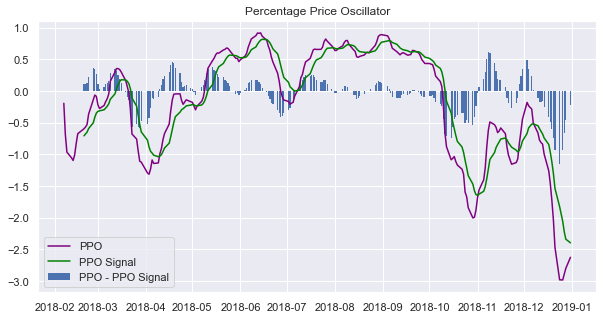

In [120]:
plot(close,figsize=(10,5))
plt.figure(figsize=(10,5))
plt.plot(ppo, label='PPO',c='purple')
plt.plot(ppo_sig, label='PPO Signal',c='green')
plt.bar(ppo_diff.index, ppo_diff, label='PPO - PPO Signal', linewidth=0)
plt.title('Percentage Price Oscillator')
plt.legend()
plt.show()

looking not so good

## Percentage Volume Oscillator (PVO)

Percentage Volume Oscillator (PVO): 
((12-day EMA of Volume - 26-day EMA of Volume)/26-day EMA of Volume) x 100

Signal Line: 9-day EMA of PVO

PVO Histogram: PVO - Signal Line

In [121]:
pvo = ta.momentum.pvo(volume)
pvo_diff = ta.momentum.pvo_hist(volume)
pvo_sig = ta.momentum.pvo_signal(volume)

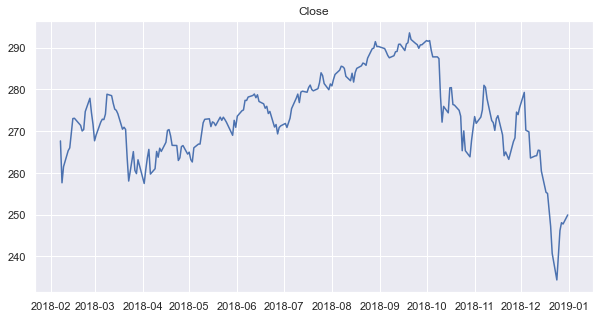

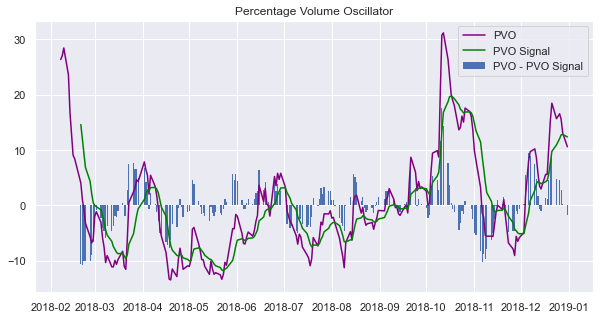

In [122]:
plot(close.loc[pvo.dropna().index],figsize=(10,5))
plt.figure(figsize=(10,5))
plt.plot(pvo, label='PVO',c='purple')
plt.plot(pvo_sig, label='PVO Signal',c='green')
plt.bar(pvo_diff.index, pvo_diff, label='PVO - PVO Signal', linewidth=0)
plt.title('Percentage Volume Oscillator')
plt.legend()
plt.show()

# Conclusion

- Relative Strength Index (RSI)
- Stochastic RSI (SRSI)
- True strength index (TSI)
- Ultimate Oscillator (UO)
- Stochastic Oscillator (SR)
- Williams %R (WR)
- Awesome Oscillator (AO)
- Kaufman's Adaptive Moving Average (KAMA)
- Rate of Change (ROC)
- Percentage Price Oscillator (PPO)
- Percentage Volume Oscillator (PVO)

What indicator can we use for features?

- It should not have trend.
- Let's find out which indicators are stationary.
    - 
    - 
    - 
- Or we can use difference of indicators itself and its ma(signal line).
- Or we can use log-diff (returns) of indicators

In [123]:
feat = [rsi,stoch_rsi,stoch_k, stoch_div,tsi,uo,roc_10,roc_20,ppo_diff,pvo_diff]

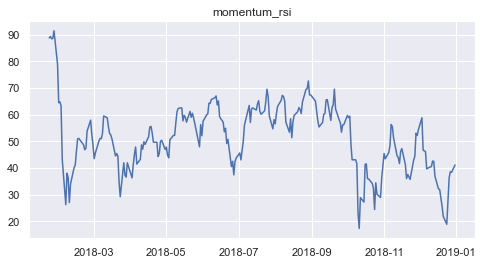

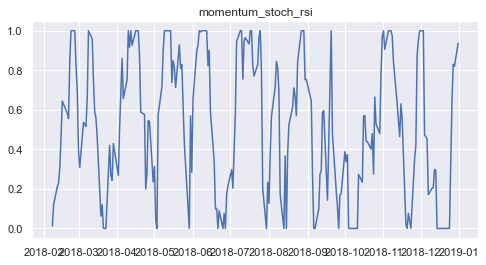

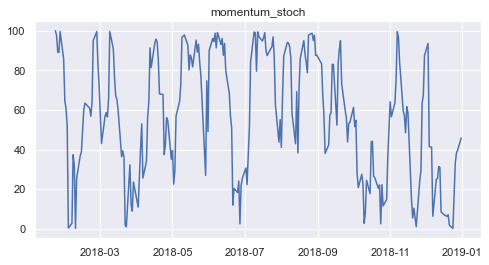

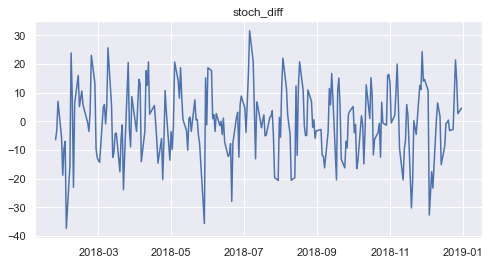

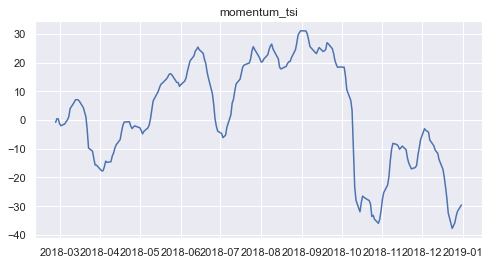

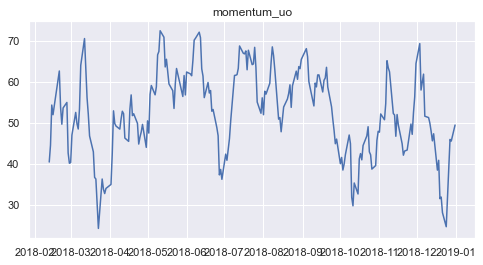

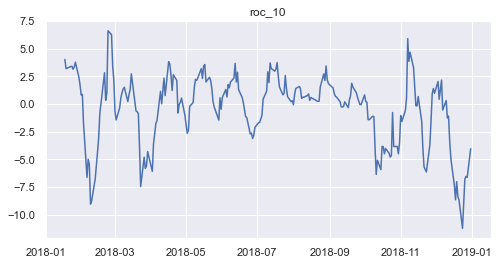

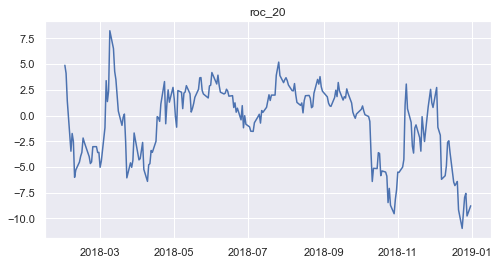

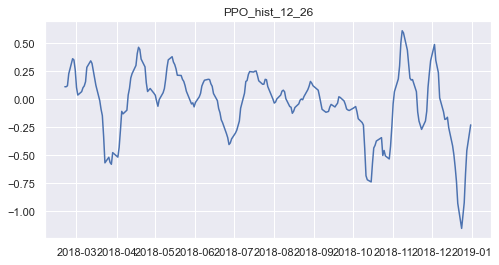

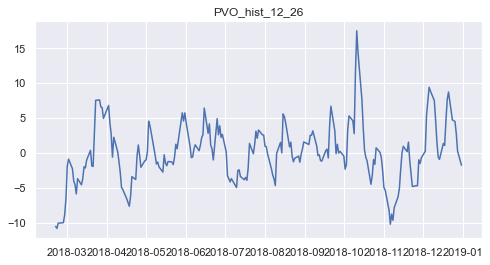

In [124]:
# possible features
for i in feat:
    plot(i)

In [125]:
features = pd.DataFrame(feat).T.dropna()
features

,momentum_rsi,momentum_stoch_rsi,momentum_stoch,stoch_diff,momentum_tsi,momentum_uo,roc_10,roc_20,PPO_hist_12_26,PVO_hist_12_26
Date,,,,,,,,,,
2018-02-26,57.966223,1.000000,99.561578,13.362984,-0.767653,55.002561,6.271511,-3.028823,0.361774,-10.015623
2018-02-27,52.497118,0.823040,82.730769,-9.709462,0.503909,42.634983,3.425793,-3.600534,0.350500,-8.907732
2018-02-28,48.545371,0.695177,72.038462,-12.738475,0.407501,40.125096,2.124060,-3.588160,0.263734,-6.574233
2018-03-01,43.531282,0.396835,56.846154,-13.692308,-1.232196,40.290820,-0.701065,-5.037247,0.106035,-1.948291
2018-03-02,45.643611,0.308384,42.989571,-14.301824,-1.976151,47.033175,-1.446727,-4.439236,0.036813,-0.896698
...,...,...,...,...,...,...,...,...,...,...
2018-12-24,18.935877,0.000000,0.157021,-2.838735,-37.752071,24.598489,-11.258378,-10.981956,-1.153763,4.728924
2018-12-26,36.362651,0.638465,33.155366,21.457471,-35.782438,38.962770,-6.795896,-7.970093,-0.924613,4.495644
2018-12-27,38.630608,0.830916,38.200747,14.363036,-33.470328,45.957462,-6.550893,-7.574516,-0.667217,2.787846


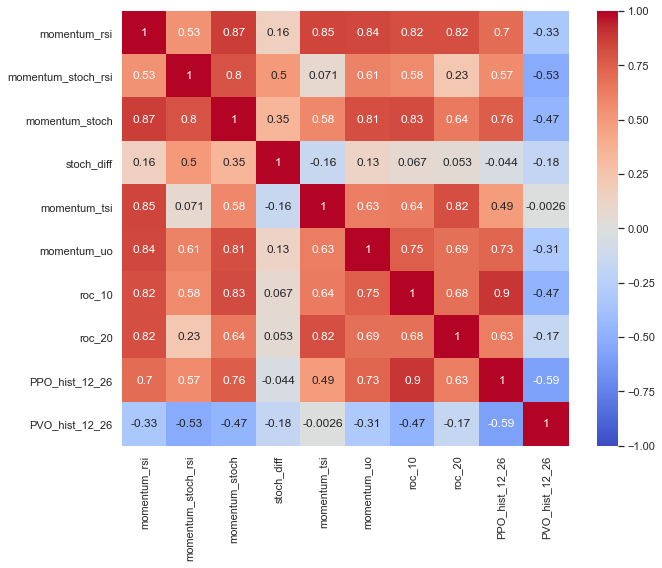

In [126]:
plt.figure(figsize=(10,8))
sns.heatmap(features.corr(), cmap='coolwarm',vmin=-1,vmax=1, annot=True)
plt.show()

For fewer features we can drop kst_diff cci, ,stc 

In [128]:
features = features.drop(columns=['momentum_stoch','momentum_tsi','momentum_uo','roc_10','roc_20'])

In [129]:
from sklearn.preprocessing import MinMaxScaler

In [130]:
def minmaxscaler(x):
    scaler = MinMaxScaler()
    return pd.DataFrame(scaler.fit_transform(x),columns=x.columns,index = x.index)

In [131]:
features = minmaxscaler(features)
features

,momentum_rsi,momentum_stoch_rsi,stoch_diff,PPO_hist_12_26,PVO_hist_12_26
Date,,,,,
2018-02-26,0.734211,1.000000,0.728426,0.858655,0.008261
2018-02-27,0.635271,0.823040,0.385825,0.852268,0.048173
2018-02-28,0.563781,0.695177,0.340847,0.803109,0.132238
2018-03-01,0.473073,0.396835,0.326684,0.713762,0.298890
2018-03-02,0.511287,0.308384,0.317633,0.674543,0.336774
...,...,...,...,...,...
2018-12-24,0.028125,0.000000,0.487848,0.000000,0.539439
2018-12-26,0.343388,0.638465,0.848621,0.129830,0.531035
2018-12-27,0.384416,0.830916,0.743276,0.275662,0.469511


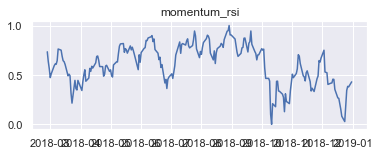

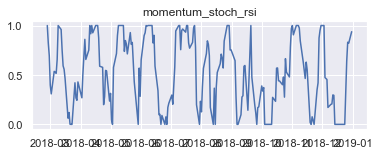

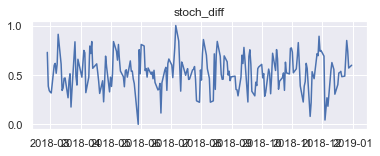

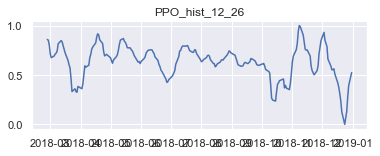

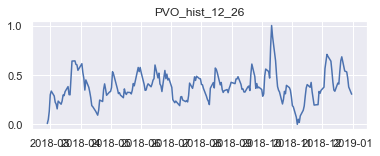

In [132]:
for i in features:
    plt.figure(figsize=(6,2))
    plt.plot(features[i])
    plt.title(i)
    plt.show()

In [133]:
y = np.sign(close.diff(-3)).rename('Direction after 3 day')

C:\Users\JHCho\anaconda3\envs\py37\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in sign
  result = getattr(ufunc, method)(*inputs, **kwargs)


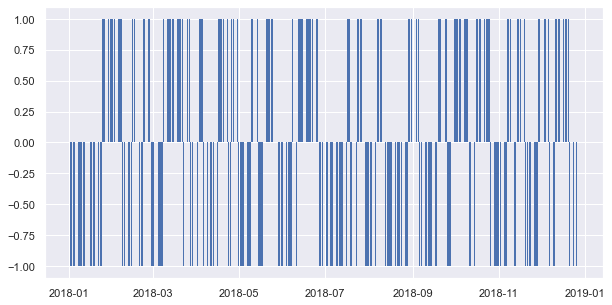

In [134]:
plt.figure(figsize=(10,5))
plt.bar(y.index,y, linewidth=0)
plt.show()

In [135]:
data = features.join(y).dropna()

In [136]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [139]:
rf.feature_importances_

array([0.19588922, 0.14689428, 0.19863681, 0.26156111, 0.19701858])